In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1. Implementar un programa que aplique el método de Heun para resolver una ecuación de la forma:

    \begin{array}{rcl} \dot{x} &=&f(t,x)\\
                             x(t_0) &=& x_0  \end{array}
                                 
   El programa debe recibir la función $f$, el dato inicial $x_0$, un intervalo de tiempo: $[t_0,t_f]$ y un parámetro para la construcción de la malla que puede ser, o bien la longitud del paso $h$, o bien el número total de pasos $n$. 
   Recordar que el método de Heun está dado por la interación:
   
    $$x_{i+i} = x_i + \frac{h}{2}\bigg(f(t_i,x_i)+f\Big(t_{i+1},x_i+hf(t_i,x_i)\Big)\bigg)$$

In [ ]:
def heun(f,x0,tiempo,h): #completar
    t0,tf = tiempo
    n = int((tf-t0)/h+1)
    t = np.linspace(t0,tf,n)
    #d = len(str(x0))
    d = 1
    x = np.zeros((n,d))
    x[0,:] = x0 
    for i in range(n-1): #completar
        x[i+1] = x[i] + (h/2)*(f(t[i],x[i]) + f(t[i+1],x[i] + h*f(t[i],x[i])))
    return t,x

2. Probar el programa del ejercicio anterior resolviendo la ecuación $\dot{x} = -x^2$, con dato inicial $x(0)=1$, cuya solución exacta es: $x(t) = \frac{1}{t+1}$. Resolver en el intervalo $[0,2]$ para diferentes valores de $h$ (o $n$), graficar las soluciones numéricas junto con la solución exacta y constatar que las soluciones numéricas aproximan a la exacta.

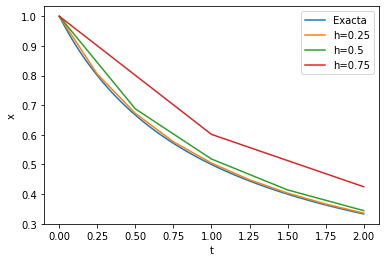

In [ ]:
f   = lambda t,x: -x**2
sol = lambda t: 1/(t+1)
x0  = 1
tt  = np.linspace(0,2,100) #esta es una malla más fina, para que la solución exacta se vea mejor
plt.plot(tt,sol(tt), label = 'Exacta')
H = [0.25, 0.5, 0.75]
for h in H: 
    t,x = heun(f, x0, [0, 2], h) 
    plt.plot(t,x, label='h={}'.format(h))
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

3. Se arroja una bolita de vidrio hacia abajo, verticalmente, imprimiéndole una velocidad inicial $v_0$. Suponiendo que la fuerza de rozamiento es proporcional al cuadrado de la velocidad, la ecuación para la velocidad es:

    $$\dot{v} = g-\frac{c_r}{m}v^2,$$
    donde $g=9.81\frac{m}{s^2}$ es la aceleración gravitatoria, $c_r$ es el coeficiente de rozamiento y $m$ es la masa de la bolita. Se asume que la velocidad es positiva cuando apunta hacia abajo. 
   <br>Consideramos el caso de una bolita de dos centímetros de diámetro, cuya masa es de $0.084$Kg, y para la cual el coeficiente de rozamiento es: $c_r = 0.028$. Resolver la ecuación para distintos valores de $v_0$, asumiendo que la altura inicial es suficientemene alta (es decir: la bolita nunca llega al piso). Graficar simultáneamente todas las soluciones obtenidas. ¿Qué se observa?

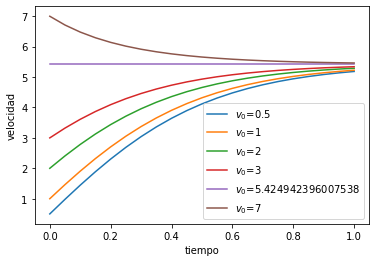

In [ ]:
g = 9.81
c = 0.028
m = 0.084
k = c/m
h = 0.05
f = lambda t,x: g - k*(x**2)
datos_iniciales = [0.5, 1, 2, 3, np.sqrt(g/k),7] 
for v0 in datos_iniciales:
    t,x = heun(f, v0, [0,1], h) 
    plt.plot(t,x, label='$v_0$={}'.format(v0))
plt.xlabel('tiempo')
plt.ylabel('velocidad')
plt.legend()
plt.show()

4. En el ejercicio anterior debería verse que, a diferencia de lo que podría suponerse a priori, la velocidad no aumenta indefinidamente sino que se estanca en torno a un determinado valor llamado velocidad límite $(v_\infty)$. El objetivo de este ejercicio es implementar un programa que estime esa velocidad límite a partir de la resolución de la ecuación. Modificar el programa del ejercicio 1. de manera tal que reciba, además de los parámetros anteriores, una tolerancia $tol$. El programa debe realizar las iteraciones del método hasta que se cumpla alguna de las siguientes condiciones: 
    a. Se alcance el tiempo final $t_f$ o,
    b. la diferencia entre dos velocidades sucesivas resulte menor que la tolerancia, es decir: $|v_{i+1}-v_i|<tol$. 
    En el caso b., se asume que el sistema alcanzó la velocidad límite y el programa debe imprimir en pantalla un cartel que diga: "La velocidad límite es..." y la velocidad correspondiente. 

In [ ]:
def heun_adaptado(f,v0,tiempo,tol,h): #Completar
    t0, tf = tiempo
    n = int((tf-t0)/h+1)
    t = np.linspace(t0,tf,n)
    d = 1
    v = np.zeros((n,d))
    v[0,:] = v0
    i = 0
    while i<(len(t)-1) and np.abs(v[i+1] - v[i]) > tol: #completar
         i = i+1
         v[i+1] = v[i] + (h/2)*(f(t[i],v[i]) + f(t[i+1],v[i] + h*f(t[i],v[i])))     
    if np.abs(v[i+1] - v[i]) < tol: #completar
        print("La velocidad límite es:", v[i])#completar
    return t,v

5. Probar el programa anterior con alguno de los datos iniciales utilizados en el punto 3.

In [ ]:
for v0 in datos_iniciales:
    t,x = heun_adaptado(f, v0, [0,2],0.00015, h=0.005)



La velocidad límite es: [5.41667389]
La velocidad límite es: [5.41667389]
La velocidad límite es: [5.41667389]
La velocidad límite es: [5.41667389]
La velocidad límite es: [5.41667389]
La velocidad límite es: [5.41667389]
